In [1]:
import mglearn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
import scipy as scipy
import sys
sys.path.append("/usr/local/lib/python2.7/dist-packages") 
import seaborn as sns

# Cross validation for evaluation

Benefits of cross validation:
* Uses the data more effectively than when using a standard training and test division
* More robust (with train-test division you may get (un)lucky)
* Gives insight into the sensitivity of the model

Disadvantage:
* Computational cost

## Example

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### Using a decision tree

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [0.9122807  0.92105263 0.92105263 0.96491228 0.89380531]


In [4]:
print("Average cross validation score: {}".format(scores.mean()))

Average cross validation score: 0.9226207110697097


In [5]:
print("Standard deviation of the cross validation scores: {}".format(scores.std()))

Standard deviation of the cross validation scores: 0.023369799978905294


### Using a naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
scores = cross_val_score(nb, cancer.data, cancer.target)

In [7]:
print("Cross validation scores: {}".format(scores))

Cross validation scores: [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]


In [8]:
print("Average cross validation score: {}".format(scores.mean()))

Average cross validation score: 0.9385188635305075


In [9]:
print("Standard deviation of the cross validation scores: {}".format(scores.std()))

Standard deviation of the cross validation scores: 0.014585994424363306


### Leave one out cross validation

Leave one out cross validation is a special type of cross validation, where each fold is a single sample
* Can provides better estimates on smaller datasets, but is more time.consuming

In [10]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

In [11]:
nb = GaussianNB()
scores = cross_val_score(nb, cancer.data, cancer.target, cv=loo)

In [12]:
print("Cross validation scores: {}".format(scores))

Cross validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1

In [13]:
print("Average cross validation score: {}".format(scores.mean()))

Average cross validation score: 0.9384885764499121


In [14]:
print("Standard deviation of the cross validation scores: {}".format(scores.std()))

Standard deviation of the cross validation scores: 0.24026603655724954


# Overfitting

## Load the data

In [16]:
from sklearn.datasets import load_breast_cancer

# Load the data and divide into training and test
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

## Decision tree overfitting

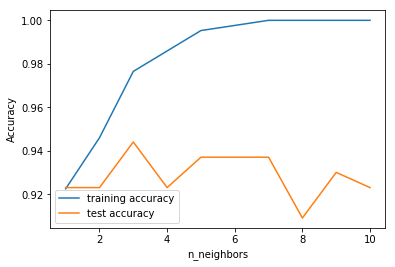

In [17]:
from sklearn.tree import DecisionTreeClassifier

training_accuracy = []
test_accuracy = []
# try max depths from 1 to 10
max_depth_list = range(1, 11)

for depth in max_depth_list:
    # build the model
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(max_depth_list, training_accuracy, label="training accuracy")
plt.plot(max_depth_list, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## kNN overfitting

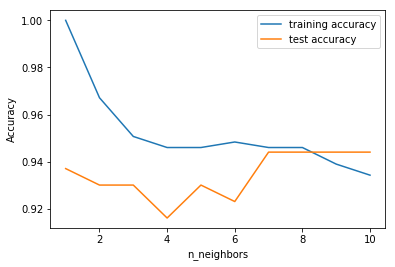

In [18]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Selecting parameters using a validation set

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

Divide the data into training data, validation data, and test data

In [20]:
cancer = load_breast_cancer()
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=43)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of validation set:{}".format(X_val.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:319
Size of validation set:107
Size of test set:143


Find the best number of neighbors using the validation set

In [21]:
best_score = 0
for num_neighbors in range(1,15):
    # Learn the model with a certain numnber of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn.fit(X_train, y_train)
    
    # Evaluate the model
    score = knn.score(X_val, y_val)
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainval, y_trainval)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best score on validation set: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best number of neighbors found: 8
Best score on validation set: 0.9626168224299065
Score on training/validation set: 0.9389671361502347
Score on test set: 0.958041958041958


## Selecting parameters using cross validation

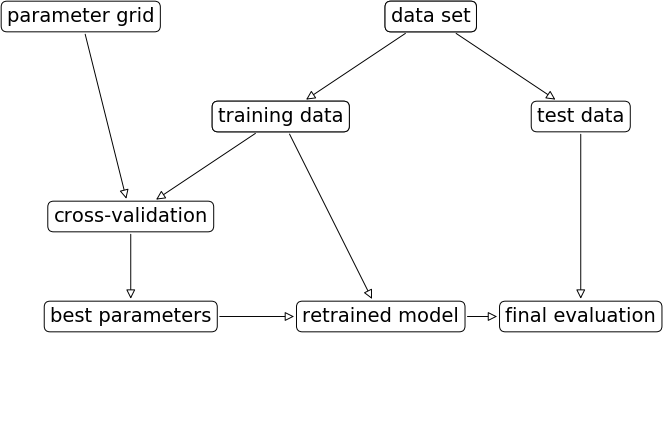

In [22]:
mglearn.plots.plot_grid_search_overview()

Divide the data into training data and test data (no validation data!)

In [23]:
cancer = load_breast_cancer()
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:319
Size of test set:143


Find the best number of neighbors using cross validation

In [24]:
from sklearn.model_selection import cross_val_score
best_score = 0
for num_neighbors in range(1,15):
    # Set a certain number of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    
    # Perform cross validation
    scores = cross_val_score(knn, X_trainval, y_trainval, cv=5)
    
    # Compute the mean score
    score = scores.mean()
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainval, y_trainval)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best average score: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best number of neighbors found: 8
Best average score: 0.9293466223698781
Score on training/validation set: 0.9389671361502347
Score on test set: 0.958041958041958


### sklearn actually has support for performing this operation

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# Fix the parameter space
parameters = {'n_neighbors': range(1,15)}
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)

In [27]:
# Load the data and divide into train and test
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

Perform the search; all results are stored within `grid_search`

In [28]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 15)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

Print some results

In [29]:
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test score: 0.96


In [30]:
print("Best parameter: {}".format(grid_search.best_params_))

Best parameter: {'n_neighbors': 8}


In [31]:
print("Best cross-validation score: {}".format(grid_search.best_score_))

Best cross-validation score: 0.9295774647887324


In [32]:
print("Best estimator: {}".format(grid_search.best_estimator_))

Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')


In [33]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000742,0.002124,0.896714,1.000000,1,{'n_neighbors': 1},14,0.965116,1.000000,0.872093,...,0.883721,1.000000,0.869048,1.000000,0.892857,1.000000,0.000137,0.000945,0.035424,0.000000
1,0.000529,0.000949,0.906103,0.967716,2,{'n_neighbors': 2},13,0.953488,0.958824,0.906977,...,0.906977,0.973529,0.857143,0.970760,0.904762,0.970760,0.000154,0.000035,0.030440,0.005300
2,0.000451,0.000978,0.917840,0.947761,3,{'n_neighbors': 3},9,0.953488,0.938235,0.883721,...,0.965116,0.941176,0.869048,0.956140,0.916667,0.947368,0.000006,0.000016,0.037583,0.007354
3,0.000451,0.000983,0.908451,0.940729,4,{'n_neighbors': 4},12,0.953488,0.929412,0.883721,...,0.941860,0.938235,0.845238,0.941520,0.916667,0.938596,0.000005,0.000009,0.039491,0.008592
4,0.000476,0.001012,0.920188,0.931923,5,{'n_neighbors': 5},6,0.953488,0.917647,0.872093,...,0.976744,0.926471,0.869048,0.932749,0.928571,0.932749,0.000015,0.000019,0.043199,0.010599
5,0.000466,0.001032,0.920188,0.933670,6,{'n_neighbors': 6},6,0.965116,0.917647,0.883721,...,0.953488,0.926471,0.869048,0.944444,0.928571,0.935673,0.000009,0.000047,0.037807,0.010371
6,0.000468,0.001030,0.922535,0.933674,7,{'n_neighbors': 7},3,0.988372,0.920588,0.872093,...,0.953488,0.926471,0.869048,0.941520,0.928571,0.935673,0.000013,0.000012,0.046405,0.008919
7,0.000456,0.001032,0.929577,0.931913,8,{'n_neighbors': 8},1,0.988372,0.917647,0.872093,...,0.976744,0.926471,0.880952,0.938596,0.928571,0.935673,0.000003,0.000005,0.047754,0.008692
8,0.000454,0.001052,0.922535,0.930158,9,{'n_neighbors': 9},3,0.988372,0.920588,0.872093,...,0.965116,0.926471,0.880952,0.935673,0.904762,0.929825,0.000003,0.000011,0.046454,0.006339
9,0.000456,0.001076,0.927230,0.929567,10,{'n_neighbors': 10},2,0.988372,0.920588,0.883721,...,0.965116,0.923529,0.880952,0.935673,0.916667,0.932749,0.000007,0.000015,0.043254,0.006281
